In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  inline
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
uni = pd.read_csv('UniversityAdmittance.csv')
uni.head()

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,Statement_Of_Purpose,Letter_Of_Recommendation,Undergraduate_GPA,Research_Experience,Chance_of_Admission
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
uni.corr()

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,Statement_Of_Purpose,Letter_Of_Recommendation,Undergraduate_GPA,Research_Experience,Chance_of_Admission
Serial_No,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE_Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL_Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University_Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
Statement_Of_Purpose,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
Letter_Of_Recommendation,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
Undergraduate_GPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research_Experience,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance_of_Admission,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [ ]:
#Linear regression - statsmodels

X=uni.loc[:, uni.columns == 'Undergraduate_GPA']
y=uni.loc[:, uni.columns == 'Chance_of_Admission']


In [ ]:
X

,Undergraduate_GPA
0,9.65
1,8.87
2,8.00
3,8.67
4,8.21
...,...
395,9.04
396,9.11
397,9.45
398,8.78


In [ ]:
y

,Chance_of_Admission
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
395,0.82
396,0.84
397,0.91
398,0.67


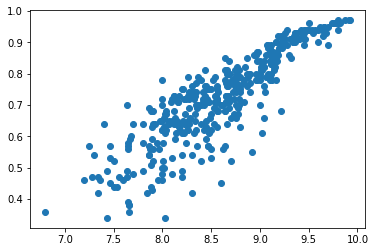

In [ ]:
plt.scatter(X, y)

In [ ]:
df=pd.concat((X,y), axis=1)
df

,Undergraduate_GPA,Chance_of_Admission
0,9.65,0.92
1,8.87,0.76
2,8.00,0.72
3,8.67,0.80
4,8.21,0.65
...,...,...
395,9.04,0.82
396,9.11,0.84
397,9.45,0.91
398,8.78,0.67


In [ ]:
Result1 = smf.ols('y ~ X', df).fit()

print(Result1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     1279.
Date:                Fri, 18 Jun 2021   Prob (F-statistic):          2.34e-126
Time:                        08:34:15   Log-Likelihood:                 499.61
No. Observations:                 400   AIC:                            -995.2
Df Residuals:                     398   BIC:                            -987.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0715      0.050    -21.285      0.0

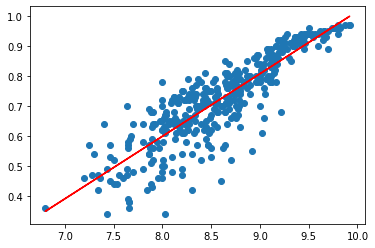

In [ ]:
plt.scatter(X, y)
plt.plot(X, Result1.fittedvalues, color='r')
plt.show()

In [ ]:
#Linear Regression - sklearn

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)

In [ ]:
k = reg.coef_
n = reg.intercept_

print(k)
print(n)

[[0.20884723]]
[-1.07151166]


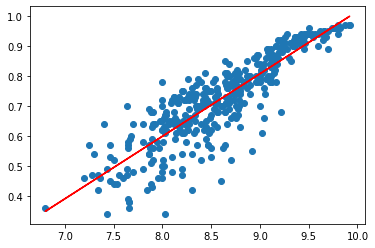

In [ ]:
y_predict = k*X + n

plt.scatter(X,y)
plt.plot(X,y_predict, color='red')

In [ ]:
#Multiple regression - statsmodels

X1=uni.loc[:, uni.columns != 'Serial_No']
X1=sm.add_constant(X1)
X1

,const,GRE_Score,TOEFL_Score,University_Rating,Statement_Of_Purpose,Letter_Of_Recommendation,Undergraduate_GPA,Research_Experience,Chance_of_Admission
0,1.0,337,118,4,4.5,4.5,9.65,1,0.92
1,1.0,324,107,4,4.0,4.5,8.87,1,0.76
2,1.0,316,104,3,3.0,3.5,8.00,1,0.72
3,1.0,322,110,3,3.5,2.5,8.67,1,0.80
4,1.0,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,1.0,324,110,3,3.5,3.5,9.04,1,0.82
396,1.0,325,107,3,3.0,3.5,9.11,1,0.84
397,1.0,330,116,4,5.0,4.5,9.45,1,0.91
398,1.0,312,103,3,3.5,4.0,8.78,0,0.67


In [ ]:
model1=sm.OLS(y, X1).fit()
print(model1.summary())

                             OLS Regression Results                            
Dep. Variable:     Chance_of_Admission   R-squared:                       1.000
Model:                             OLS   Adj. R-squared:                  1.000
Method:                  Least Squares   F-statistic:                 3.095e+29
Date:                 Fri, 18 Jun 2021   Prob (F-statistic):               0.00
Time:                         08:34:15   Log-Likelihood:                 13015.
No. Observations:                  400   AIC:                        -2.601e+04
Df Residuals:                      391   BIC:                        -2.598e+04
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const         

In [ ]:
#Multiple regression (two features dependence) 

Result3 = smf.ols("GRE_Score ~ Letter_Of_Recommendation + Research_Experience", uni).fit()
print(Result3.summary())

                            OLS Regression Results                            
Dep. Variable:              GRE_Score   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     171.8
Date:                Fri, 18 Jun 2021   Prob (F-statistic):           1.77e-54
Time:                        08:34:15   Log-Likelihood:                -1418.4
No. Observations:                 400   AIC:                             2843.
Df Residuals:                     397   BIC:                             2855.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [ ]:
Result4 = smf.ols('GRE_Score ~ Letter_Of_Recommendation * Research_Experience', uni).fit()

print(Result4.summary())

                            OLS Regression Results                            
Dep. Variable:              GRE_Score   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     116.0
Date:                Fri, 18 Jun 2021   Prob (F-statistic):           6.34e-54
Time:                        08:34:15   Log-Likelihood:                -1417.0
No. Observations:                 400   AIC:                             2842.
Df Residuals:                     396   BIC:                             2858.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [ ]:
#Polynomial regression - statsmodels

Result5 = smf.ols('y ~ X+I(X**2)+I(X**3)', df).fit()

print(Result5.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     426.0
Date:                Fri, 18 Jun 2021   Prob (F-statistic):          1.54e-123
Time:                        08:34:15   Log-Likelihood:                 500.28
No. Observations:                 400   AIC:                            -992.6
Df Residuals:                     396   BIC:                            -976.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6700      6.004      0.611      0.5

In [ ]:
#Unconditional & Conditional Probabilities

#unconditional

temp=uni.Letter_Of_Recommendation.value_counts().sort_index()
temp

1.0     1
1.5     7
2.0    38
2.5    39
3.0    85
3.5    73
4.0    77
4.5    45
5.0    35
Name: Letter_Of_Recommendation, dtype: int64

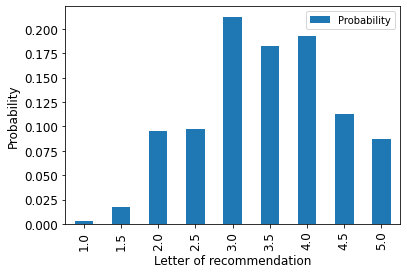

     Probability
1.0       0.0025
1.5       0.0175
2.0       0.0950
2.5       0.0975
3.0       0.2125
3.5       0.1825
4.0       0.1925
4.5       0.1125
5.0       0.0875
Probability    1.0
dtype: float64
Probability    0.2125
dtype: float64


In [ ]:
P_L = pd.DataFrame((temp/temp.sum()).sort_index())
P_L.columns = ["Probability"]

P_L.plot.bar(fontsize=12)
plt.ylabel("Probability",fontsize=12)
plt.xlabel("Letter of recommendation",fontsize=12)
plt.show()
print(P_L)
print(P_L.sum())
print(P_L.max())

In [ ]:
#Conditional probabilities
uni.TOEFL_Score.unique()

array([118, 107, 104, 110, 103, 115, 109, 101, 102, 108, 106, 111, 112,
       105, 114, 116, 119, 120,  98,  93,  99,  97, 117, 113, 100,  95,
        96,  94,  92])

In [ ]:
data_temp = (uni.TOEFL_Score<106).value_counts()
data_temp

False    241
True     159
Name: TOEFL_Score, dtype: int64

In [ ]:
data_temp1 = (uni.TOEFL_Score==106).value_counts()
data_temp1

False    376
True      24
Name: TOEFL_Score, dtype: int64

In [ ]:
data_temp2 = (uni.TOEFL_Score>106).value_counts()
data_temp2

True     217
False    183
Name: TOEFL_Score, dtype: int64

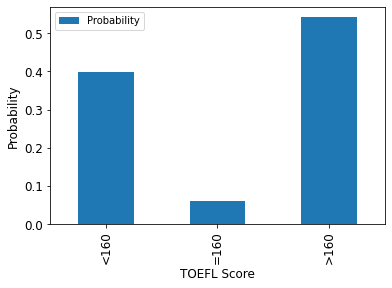

      Probability
<160       0.3975
=160       0.0600
>160       0.5425
Probability    1.0
dtype: float64
Probability    0.5425
dtype: float64


In [ ]:
P_S = pd.DataFrame([data_temp[True], data_temp1[True], data_temp2[True]])/len(uni)
P_S.index = ["<160","=160",">160"]
P_S.columns = ["Probability"]

P_S.plot.bar(fontsize=12)
plt.ylabel("Probability",fontsize=12)
plt.xlabel("TOEFL Score",fontsize=12)
plt.show()
print(P_S)
print(P_S.sum())
print(P_S.max())

In [ ]:
data_temp3 = (uni.TOEFL_Score>160 & (uni.Letter_Of_Recommendation>3.0)).value_counts()
data_temp3

True    400
dtype: int64

In [ ]:
len(data_temp1)

2

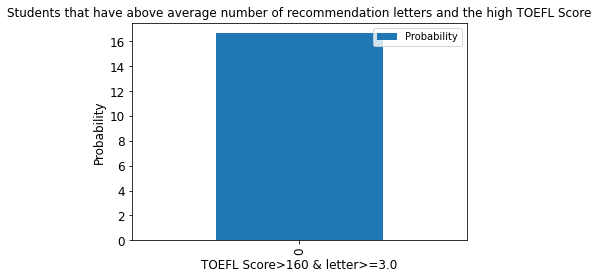

   Probability
0    16.666667
Probability    16.666667
dtype: float64
True     315
False     85
Name: Letter_Of_Recommendation, dtype: int64


In [ ]:
P_S_L = pd.DataFrame([data_temp3[True]])/(data_temp1[True])
P_S_L.columns = ["Probability"]
P_S_L.plot.bar(fontsize=12)

plt.title("Students that have above average number of recommendation letters and the high TOEFL Score")
plt.ylabel("Probability",fontsize=12)
plt.xlabel("TOEFL Score>160 & letter>=3.0",fontsize=12)
plt.show()
print(P_S_L)
print(P_S_L.sum())
print((uni.Letter_Of_Recommendation>=3.0).value_counts())

In [ ]:
#Estimation of confidence intervals of certain parameters

mean_estimators = []

sample_size=150
number_of_mean_estimators=50
for x in range(number_of_mean_estimators):
    sample=uni['Chance_of_Admission'].sample(sample_size)
    mean_estimators.append(sample.values.mean())


In [ ]:
alpha=0.05
std=uni['Chance_of_Admission'].std()

quantile_order=1-alpha/2
Quantile = stats.norm.ppf(quantile_order)
margin = Quantile * (std/sample_size**0.5)

In [ ]:
confidence_interval = (mean_estimators[0] - margin, mean_estimators[0] + margin)
print(mean_estimators[0])
print(confidence_interval)

0.7008
(0.6779781733870399, 0.72362182661296)


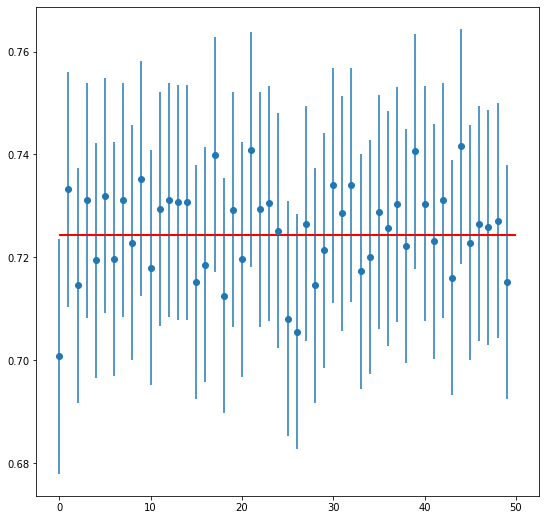

In [ ]:
CIs=[]
for i in range(0,number_of_mean_estimators):
    CIs.append((mean_estimators[i] - margin, mean_estimators[i] + margin))

plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0, number_of_mean_estimators),
             y=mean_estimators[0:number_of_mean_estimators],
             yerr=[(up-down)/2 for up,down in CIs],
             fmt='o')

plt.hlines(xmin=0, xmax=number_of_mean_estimators,
           y=uni['Chance_of_Admission'].mean(),
           linewidth=2.0,
           color="red")

plt.show()

In [ ]:
#Estimation of the parameters of distributions of single variables

uni.describe()

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,Statement_Of_Purpose,Letter_Of_Recommendation,Undergraduate_GPA,Research_Experience,Chance_of_Admission
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
uni.quantile(0.85)

Serial_No                   340.15
GRE_Score                   329.00
TOEFL_Score                 114.00
University_Rating             4.15
Statement_Of_Purpose          4.50
Letter_Of_Recommendation      4.50
Undergraduate_GPA             9.23
Research_Experience           1.00
Chance_of_Admission           0.89
Name: 0.85, dtype: float64

In [ ]:
uni.var()

Serial_No                   13366.666667
GRE_Score                     131.644555
TOEFL_Score                    36.838997
University_Rating               1.308114
Statement_Of_Purpose            1.013784
Letter_Of_Recommendation        0.807262
Undergraduate_GPA               0.355594
Research_Experience             0.248365
Chance_of_Admission             0.020337
dtype: float64

In [ ]:
uni.std()

Serial_No                   115.614301
GRE_Score                    11.473646
TOEFL_Score                   6.069514
University_Rating             1.143728
Statement_Of_Purpose          1.006869
Letter_Of_Recommendation      0.898478
Undergraduate_GPA             0.596317
Research_Experience           0.498362
Chance_of_Admission           0.142609
dtype: float64

In [ ]:
uni.median()

Serial_No                   200.50
GRE_Score                   317.00
TOEFL_Score                 107.00
University_Rating             3.00
Statement_Of_Purpose          3.50
Letter_Of_Recommendation      3.50
Undergraduate_GPA             8.61
Research_Experience           1.00
Chance_of_Admission           0.73
dtype: float64

In [ ]:
#Estimation of the parameters of the joint distributions (covariance, correlation coefficient)

uni.cov()

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,Statement_Of_Purpose,Letter_Of_Recommendation,Undergraduate_GPA,Research_Experience,Chance_of_Admission
Serial_No,13366.666667,-129.369674,-103.807018,-22.472431,-19.432331,-9.164160,-3.144373,-3.637845,0.698020
GRE_Score,-129.369674,131.644555,58.216967,8.778791,7.079699,5.747726,5.699742,3.318690,1.313271
TOEFL_Score,-103.807018,58.216967,36.838997,4.828697,4.021053,3.095965,2.998337,1.481729,0.685179
University_Rating,-22.472431,8.778791,4.828697,1.308114,0.845865,0.678352,0.509117,0.255232,0.116009
Statement_Of_Purpose,-19.432331,7.079699,4.021053,0.845865,1.013784,0.660025,0.431183,0.222807,0.097028
Letter_Of_Recommendation,-9.164160,5.747726,3.095965,0.678352,0.660025,0.807262,0.359084,0.177701,0.085834
Undergraduate_GPA,-3.144373,5.699742,2.998337,0.509117,0.431183,0.359084,0.355594,0.155026,0.074265
Research_Experience,-3.637845,3.318690,1.481729,0.255232,0.222807,0.177701,0.155026,0.248365,0.039317
Chance_of_Admission,0.698020,1.313271,0.685179,0.116009,0.097028,0.085834,0.074265,0.039317,0.020337


In [ ]:
uni.corr()

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,Statement_Of_Purpose,Letter_Of_Recommendation,Undergraduate_GPA,Research_Experience,Chance_of_Admission
Serial_No,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE_Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL_Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University_Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
Statement_Of_Purpose,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
Letter_Of_Recommendation,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
Undergraduate_GPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research_Experience,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance_of_Admission,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [ ]:
uni.cov()['GRE_Score']['TOEFL_Score']/(uni.std()['GRE_Score']*uni.std()['TOEFL_Score'])

0.835976803014396

In [ ]:
#Parametric hypothesis testing

mean_estimators = []

sample_size=150
number_of_mean_estimators=50
for x in range(number_of_mean_estimators):
    sample=uni['Chance_of_Admission'].sample(sample_size)
    mean_estimators.append(sample.values.mean())

In [ ]:
alpha=0.05 
std=uni['Chance_of_Admission'].std()

quantile_order=1-alpha/2
Quantile = stats.norm.ppf(quantile_order)
margin = Quantile * (std/sample_size**0.5)

In [ ]:
confidence_interval = (mean_estimators[0] - margin, mean_estimators[0] + margin)
print(mean_estimators[0])
print(confidence_interval)

0.7292666666666666
(0.7064448400537066, 0.7520884932796267)


In [ ]:
p_value=2*(1-stats.t.cdf(Quantile,df=sample_size-1))
    
p_value

0.05186570552050895